In [34]:
import pandas as pd

# load the dataset
file_path = "/Users/kostaskes/Documents/code/Projects/Activities.csv"
df = pd.read_csv(file_path)

# this will allow printing all rows and all columns 
# pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)



# display basic info
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Activity Type      1978 non-null   object
 1   Date               1978 non-null   object
 2   Title              1978 non-null   object
 3   Distance           1978 non-null   object
 4   Calories           1978 non-null   object
 5   Time               1978 non-null   object
 6   Avg HR             1978 non-null   object
 7   Max HR             1978 non-null   object
 8   Aerobic TE         1978 non-null   object
 9   Avg Speed          1978 non-null   object
 10  Max Speed          1978 non-null   object
 11  Total Ascent       1978 non-null   object
 12  Total Descent      1978 non-null   object
 13  Avg Stride Length  1978 non-null   object
 14  Steps              1978 non-null   object
 15  Min Temp           1978 non-null   object
 16  Best Lap Time      1978 non-null   object


In [35]:
# convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# extract year, month, and month_name
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str) 

# extract hour and minute as 'time_of_the_day'
df['Time_of_the_day'] = df['Date'].dt.strftime('%H:%M')

In [36]:
print("Start date:", df['Date'].min())
print("End date:", df['Date'].max())


Start date: 2019-01-24 18:30:08
End date: 2025-02-11 08:12:19


# The dataset spans from January 24, 2019 to February 11, 2025,
# covering over 6 years of activity data.


In [37]:
# force the conversion again to ensure it's treated as numeric
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')  # Convert to numeric, with errors as NaN
# replace 0 in the Distance column with NaN
df['Distance'] = df['Distance'].replace(0, float('nan'))

In [38]:
# filter for Open Water Swimming activities
open_water_swimming = df[df['Activity Type'] == 'Open Water Swimming']

# print the activity type and distance for Open Water Swimming
print(open_water_swimming[['Activity Type', 'Distance']])


            Activity Type  Distance
1207  Open Water Swimming     843.0
1208  Open Water Swimming     714.0
1209  Open Water Swimming     650.0
1210  Open Water Swimming     602.0
1211  Open Water Swimming     416.0
1212  Open Water Swimming     626.0
1237  Open Water Swimming     554.0
1238  Open Water Swimming     586.0
1239  Open Water Swimming     632.0
1240  Open Water Swimming    1135.0
1241  Open Water Swimming     704.0
1242  Open Water Swimming     638.0
1243  Open Water Swimming     686.0
1244  Open Water Swimming     480.0
1245  Open Water Swimming     501.0
1246  Open Water Swimming    1001.0
1247  Open Water Swimming     708.0
1248  Open Water Swimming     502.0
1249  Open Water Swimming     658.0
1250  Open Water Swimming     340.0
1251  Open Water Swimming     538.0
1258  Open Water Swimming     411.0


In [39]:
# convert 'Distance' to kilometers for Open Water Swimming activities
df.loc[df['Activity Type'] == 'Open Water Swimming', 'Distance'] = df['Distance'] / 1000


In [40]:
# print all Open Water Swimming activities with just the 'Distance' column
print(df[df['Activity Type'] == 'Open Water Swimming'][['Activity Type', 'Distance']])


            Activity Type  Distance
1207  Open Water Swimming     0.843
1208  Open Water Swimming     0.714
1209  Open Water Swimming     0.650
1210  Open Water Swimming     0.602
1211  Open Water Swimming     0.416
1212  Open Water Swimming     0.626
1237  Open Water Swimming     0.554
1238  Open Water Swimming     0.586
1239  Open Water Swimming     0.632
1240  Open Water Swimming     1.135
1241  Open Water Swimming     0.704
1242  Open Water Swimming     0.638
1243  Open Water Swimming     0.686
1244  Open Water Swimming     0.480
1245  Open Water Swimming     0.501
1246  Open Water Swimming     1.001
1247  Open Water Swimming     0.708
1248  Open Water Swimming     0.502
1249  Open Water Swimming     0.658
1250  Open Water Swimming     0.340
1251  Open Water Swimming     0.538
1258  Open Water Swimming     0.411


In [41]:
df.head(10)

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Stride Length,Steps,Min Temp,Best Lap Time,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Year,Month,Month_Name,YearMonth,Time_of_the_day
0,Strength Training,2023-07-16 08:33:30,Strength,NaN,99,00:39:16,69,100,0.1,--,--,--,--,--,8,32.0,00:39:16,33.0,--,--,--,00:39:16,00:39:16,--,--,2023,7,July,2023-07,08:33
1,Strength Training,2023-06-30 15:06:33,Strength,NaN,99,00:39:35,69,102,0.1,--,--,--,--,--,12,31.0,00:39:35,33.0,--,--,--,00:39:35,00:39:35,--,--,2023,6,June,2023-06,15:06
2,Yoga,2024-03-22 08:12:44,Yoga,NaN,99,00:20:51,90,105,0.2,--,--,--,--,--,--,30.0,00:20:51,31.0,15,11,17,00:20:51,00:20:51,--,--,2024,3,March,2024-03,08:12
3,Yoga,2023-04-12 21:39:00,Yoga,NaN,99,00:46:20,69,98,0.0,--,--,--,--,--,44,27.0,00:46:20,31.0,19,12,22,00:46:20,00:46:20,--,--,2023,4,April,2023-04,21:39
4,Yoga,2022-11-16 21:49:35,Yoga,NaN,99,00:40:25,70,92,0.1,--,--,--,--,--,--,29.0,00:40:25,31.0,16,12,20,00:40:25,00:40:25,--,--,2022,11,November,2022-11,21:49
5,Strength Training,2023-12-29 09:59:09,Strength,NaN,98,00:31:10,73,135,0.3,--,--,--,--,--,18,28.0,00:31:10,29.0,--,--,--,00:31:10,00:31:10,--,--,2023,12,December,2023-12,09:59
6,Strength Training,2023-07-04 21:29:48,Strength,NaN,98,00:37:51,69,95,0.1,--,--,--,--,--,26,32.0,00:37:51,34.0,--,--,--,00:37:51,00:37:51,--,--,2023,7,July,2023-07,21:29
7,Strength Training,2023-06-14 18:25:34,Strength,NaN,98,00:35:47,72,104,0.1,--,--,--,--,--,64,31.0,00:35:47,32.0,--,--,--,00:35:47,00:35:47,--,--,2023,6,June,2023-06,18:25
8,Yoga,2024-04-09 08:20:41,Yoga,NaN,97,00:20:44,91,107,0.2,--,--,--,--,--,--,30.0,00:20:44,33.0,16,12,18,00:20:44,00:20:44,--,--,2024,4,April,2024-04,08:20
9,Strength Training,2024-02-07 15:46:54,Strength,NaN,96,00:26:50,76,110,0.1,--,--,--,--,--,14,29.0,00:26:50,30.0,--,--,--,00:26:50,00:26:50,--,--,2024,2,February,2024-02,15:46


In [42]:
columns_to_convert = [
    'Calories', 'Avg HR', 'Max HR', 'Aerobic TE', 'Total Ascent', 
    'Total Descent', 'Steps', 'Avg Resp', 'Min Resp', 'Max Resp', 
    'Min Elevation', 'Max Elevation'
]

# apply the conversion to all specified columns
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Activity Type      1978 non-null   object        
 1   Date               1978 non-null   datetime64[ns]
 2   Title              1978 non-null   object        
 3   Distance           1377 non-null   float64       
 4   Calories           1977 non-null   float64       
 5   Time               1978 non-null   object        
 6   Avg HR             1972 non-null   float64       
 7   Max HR             1935 non-null   float64       
 8   Aerobic TE         1445 non-null   float64       
 9   Avg Speed          1978 non-null   object        
 10  Max Speed          1978 non-null   object        
 11  Total Ascent       1288 non-null   float64       
 12  Total Descent      1299 non-null   float64       
 13  Avg Stride Length  1978 non-null   object        
 14  Steps   

In [44]:
# create a DataFrame for each activity type
activity_types = df['Activity Type'].unique()  # get unique activity types

# print the unique activity types
print(activity_types)

['Strength Training' 'Yoga' 'Other' 'Gym & Fitness Equipment' 'HIIT'
 'Elliptical' 'Cardio' 'Indoor Cycling' 'Cycling' 'Walking' 'Hiking'
 'Trail Running' 'Casual Walking' 'Resort Skiing/Snowboarding'
 'Stand Up Paddleboarding' 'Open Water Swimming' 'Running'
 'Treadmill Running' 'Multisport']


In [45]:
# count the number of activities for each activity type
activity_counts = df['Activity Type'].value_counts()

# print the counts
print(activity_counts)


Activity Type
Running                       623
Walking                       587
Strength Training             339
Yoga                           98
Other                          84
Gym & Fitness Equipment        66
Trail Running                  42
Hiking                         32
Elliptical                     28
Open Water Swimming            22
Cycling                        16
HIIT                           12
Treadmill Running               8
Cardio                          6
Resort Skiing/Snowboarding      6
Indoor Cycling                  4
Stand Up Paddleboarding         2
Multisport                      2
Casual Walking                  1
Name: count, dtype: int64


In [52]:
# Filter for running and trail running activities
running_activities = df[df['Activity Type'].isin(['Running', 'Trail Running'])]

# Count the number of runs
total_runs = running_activities.shape[0]

print(f"You’ve completed {total_runs} running activities (including trail runs) since you started in 2019.")


You’ve completed 665 running activities (including trail runs) since you started in 2019.


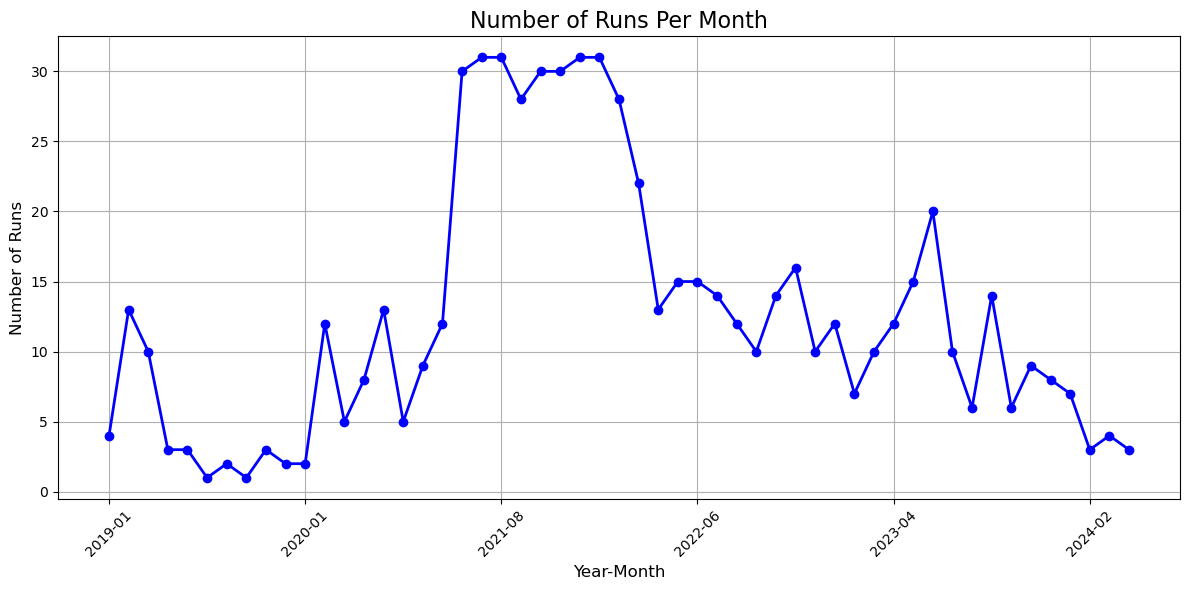

In [54]:
import matplotlib.pyplot as plt

# Plotting the number of runs per month
plt.figure(figsize=(12, 6))  # Set the figure size
runs_per_month.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.title('Number of Runs Per Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Runs', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()
